# Модель производства бумаги (процесс резки)

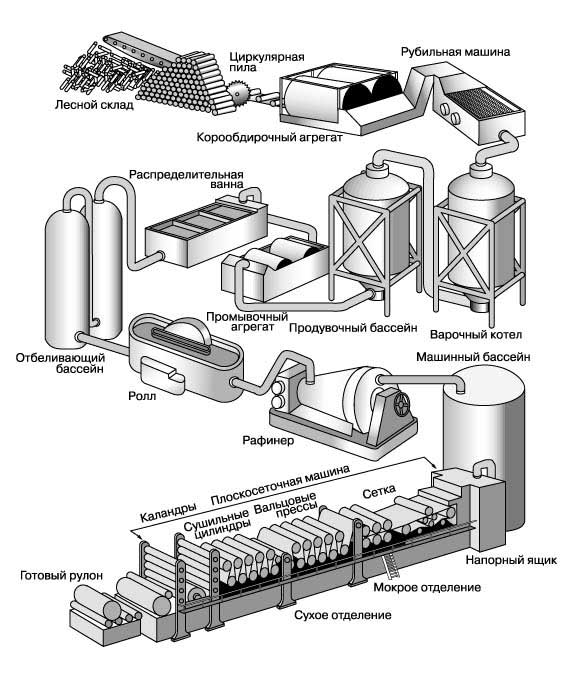

В данном проекте выбранны 3 наиболее подходящие метода машинного обучения такие, как: классификация, линейная регрессия, кластеризация.

- 1. Классификация. Классификация позволяет отнести каждый объект или ситуацию к определенному классу в соответствии с его характеристиками или свойствами. В процессе резки бумаги классификация может использоваться для определения типа бумаги и настроить режимы резки в соответствии с этими типами. Например, модель может классифицировать бумагу на основе ее плотности, толщины или других характеристик. Это помогает автоматически отбирать правильные настройки и параметры для резки с учетом конкретного типа бумаги. 

- 2. Линейная регрессия. Линейная регрессия используется для предсказания численных значений на основе зависимостей и трендов. В модели производства бумаги линейная регрессия может быть полезна для подбора оптимальных параметров резки на основе исторических данных. Например, прогнозирование скорости выполнения заказа на основе данных о заказах. Целевая переменная - скорость выполнения заказа. 


- 3. Кластеризация. Кластеризация позволяет группировать объекты на основе сходства. Можно разделить материалы на кластеры с различными диапазонами толщины, такие как "тонкая", "средняя" и "толстая" бумага. Это может помочь оптимизировать процесс резки, уменьшить отходы и повысить производительность.

Использование этих методов машинного обучения в модели производства бумаги обосновано тем, что они предоставляют возможность автоматизации и оптимизации процесса резки, улучшают точность и эффективность работы, а также помогают избежать ошибок, связанных с человеческим фактором. Кроме того, эти методы имеют широкую поддержку в научных и технических кругах, легко применяются и адаптируются под конкретные задачи производства бумаги.

## База данных

In [1]:
import pyodbc
import pandas as pd

# Определим строку подключения
conn_str = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=C:\Users\alina\Downloads\Database1.accdb;' # свой путь до файла
)

# Подключаемся к базе данных
conn = pyodbc.connect(conn_str)

# Определим SQL-запрос
queries = {
    'Заказы': 'SELECT * FROM Заказы',
    'Исполнители': 'SELECT * FROM Исполнители',
    'Материалы': 'SELECT * FROM Материалы',
    'Параметры листа': 'SELECT * FROM [Параметры листа]',
    'Шаблоны': 'SELECT * FROM Шаблоны'
}

#Выполняем запрос и получаем результаты
cursor = conn.cursor()
results = {}
for table, query in queries.items():
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [column[0] for column in cursor.description]
    df = pd.DataFrame.from_records(rows, columns=columns)
    results[table] = df

#результаты
for table, df in results.items():
    print(f"{table}:")
    print(df)
    
#Закрываем соединение
conn.close()

Заказы:
   ID заказа  ID клиента Дата заказа      Статус заказа  ID исполнителя  \
0          1        4769  2023-09-01         В процессе               1   
1          2        8321  2023-08-17           Выполнен               2   
2          3        2154  2023-07-05           Выполнен               3   
3          4        6897  2023-09-13  Ожидает обработки               2   
4          5        3920  2023-08-25         В процессе               3   

  ID материала ID шаблона  
0            1          4  
1            5          3  
2            4          1  
3            2          2  
4            3          1  
Исполнители:
   ID исполнителя                 Имя исполнителя Должность исполнителя  \
0               1       Ольга Витальевна Смирнова  Менеджер по продажам   
1               2         Алексей Иванович Петров      Главный технолог   
2               3  Владимир Константинович Белкин    Инженер - технолог   

  Контактные данные  
0       79991234567  
1       7999234

### Загрузка данных 

In [2]:
orders = results['Заказы']
performers = results['Исполнители']
materials = results['Материалы']
parameters = results['Параметры листа']
templates = results['Шаблоны']

In [3]:
orders

,ID заказа,ID клиента,Дата заказа,Статус заказа,ID исполнителя,ID материала,ID шаблона
0,1,4769,2023-09-01,В процессе,1,1,4
1,2,8321,2023-08-17,Выполнен,2,5,3
2,3,2154,2023-07-05,Выполнен,3,4,1
3,4,6897,2023-09-13,Ожидает обработки,2,2,2
4,5,3920,2023-08-25,В процессе,3,3,1


In [4]:
performers

,ID исполнителя,Имя исполнителя,Должность исполнителя,Контактные данные
0,1,Ольга Витальевна Смирнова,Менеджер по продажам,79991234567
1,2,Алексей Иванович Петров,Главный технолог,79992345678
2,3,Владимир Константинович Белкин,Инженер - технолог,79993456789


In [5]:
materials

,ID материала,Название материала,Толщина материала (мм),Свойство материала,Доступные размеры(см)
0,1,Целлюлоза,0.1 - 0.5,"Высокая прочность, хорошая устойчивость к влаге","50x70, 70x100, 100x150"
1,2,Рециклированная бумага,0.05 - 0.3,"Экологически чистый, низкая стоимость","60x80, 80x100, 100x120"
2,3,Хлопковая бумага,0.15 - 0.7,"Мягкий на ощупь, хорошая впитываемость чернил","50x70, 70x100, 100x150"
3,4,Крафт - бумага,0.1 - 0.4,"Высокая прочность, устойчивость к растяжению","60x80, 80x100, 100x120"
4,5,Пергаментная бумага,0.05 - 0.2,"Прозрачный, жиронепроницаемый","30x40, 40x60, 60x80"


In [6]:
parameters

,ID параметра,Название параметра,Единицы измерения,Значение параметра
0,1,Длина,см,20
1,2,Ширина,см,15
2,3,Диаметр,см,10
3,4,Длина стороны a,см,12
4,5,Длина стороны b,см,10
5,6,Длина стороны c,см,8
6,7,Кол-во конечностей,штуки,5


In [7]:
templates

,ID шаблона,Название шаблона,Описание шаблона,Параметры для резки бумаги
0,1,Прямоугольник,для резки бумаги в форме прямоугольника,"длина, ширина"
1,2,Круг,для резки бумаги в форме круга,диаметр
2,3,Овал,для резки бумаги в форме овала,"длина, ширина"
3,4,Треугольник,для резки бумаги в форме треугольника,"длина стороны a, длина стороны b, длина стороны c"
4,5,Звезда,для резки бумаги в форме звезды,"длина стороны, количество конечностей"


#### Перевод форматов

In [8]:
orders.dtypes

ID заказа                  int64
ID клиента                 int64
Дата заказа       datetime64[ns]
Статус заказа             object
ID исполнителя             int64
ID материала              object
ID шаблона                object
dtype: object

In [9]:
orders['Статус заказа'] = orders['Статус заказа'].astype(str)
orders['ID материала'] = orders['ID материала'].astype(int)
orders['ID шаблона'] = orders['ID шаблона'].astype(int)
orders.dtypes

ID заказа                  int64
ID клиента                 int64
Дата заказа       datetime64[ns]
Статус заказа             object
ID исполнителя             int64
ID материала               int32
ID шаблона                 int32
dtype: object

In [10]:
materials.dtypes

ID материала               int64
Название материала        object
Толщина материала (мм)    object
Свойство материала        object
Доступные размеры(см)     object
dtype: object

In [11]:
materials['Название материала'] = materials['Название материала'].astype(str)
materials['Толщина материала (мм)'] = materials['ID материала'].astype(float)
materials['Свойство материала'] = materials['Свойство материала'].astype(str)
materials['Доступные размеры(см)'] = materials['Доступные размеры(см)'].astype(str)
materials.dtypes

ID материала                int64
Название материала         object
Толщина материала (мм)    float64
Свойство материала         object
Доступные размеры(см)      object
dtype: object

### Классификация

Можно обучить модель классификации, чтобы определить тип бумаги и настроить режимы резки в соответствии с этими типами. Например, модель может классифицировать бумагу на основе ее плотности, толщины или других характеристик.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.merge(orders, materials, on=['ID материала'])
df

,ID заказа,ID клиента,Дата заказа,Статус заказа,ID исполнителя,ID материала,ID шаблона,Название материала,Толщина материала (мм),Свойство материала,Доступные размеры(см)
0,1,4769,2023-09-01,В процессе,1,1,4,Целлюлоза,1.0,"Высокая прочность, хорошая устойчивость к влаге","50x70, 70x100, 100x150"
1,2,8321,2023-08-17,Выполнен,2,5,3,Пергаментная бумага,5.0,"Прозрачный, жиронепроницаемый","30x40, 40x60, 60x80"
2,3,2154,2023-07-05,Выполнен,3,4,1,Крафт - бумага,4.0,"Высокая прочность, устойчивость к растяжению","60x80, 80x100, 100x120"
3,4,6897,2023-09-13,Ожидает обработки,2,2,2,Рециклированная бумага,2.0,"Экологически чистый, низкая стоимость","60x80, 80x100, 100x120"
4,5,3920,2023-08-25,В процессе,3,3,1,Хлопковая бумага,3.0,"Мягкий на ощупь, хорошая впитываемость чернил","50x70, 70x100, 100x150"


In [13]:
# Удаление ненужных столбцов
df = df.drop(['ID шаблона','Название материала','ID заказа', 'ID клиента', 'Дата заказа', 'Статус заказа', 'ID исполнителя', 'Доступные размеры(см)'], axis=1)
df

,ID материала,Толщина материала (мм),Свойство материала
0,1,1.0,"Высокая прочность, хорошая устойчивость к влаге"
1,5,5.0,"Прозрачный, жиронепроницаемый"
2,4,4.0,"Высокая прочность, устойчивость к растяжению"
3,2,2.0,"Экологически чистый, низкая стоимость"
4,3,3.0,"Мягкий на ощупь, хорошая впитываемость чернил"


In [14]:
# Разделение свойств материала
df['Свойство материала'] = df['Свойство материала'].str.split(',')
df = df.explode('Свойство материала').reset_index(drop=True)

df

,ID материала,Толщина материала (мм),Свойство материала
0,1,1.0,Высокая прочность
1,1,1.0,хорошая устойчивость к влаге
2,5,5.0,Прозрачный
3,5,5.0,жиронепроницаемый
4,4,4.0,Высокая прочность
5,4,4.0,устойчивость к растяжению
6,2,2.0,Экологически чистый
7,2,2.0,низкая стоимость
8,3,3.0,Мягкий на ощупь
9,3,3.0,хорошая впитываемость чернил


In [15]:
# Преобразование категориальных переменных в числовой формат
label_encoder = LabelEncoder()
df['Свойство материала'] = label_encoder.fit_transform(df['Свойство материала'])

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('ID материала', axis=1)
y = df['ID материала']

In [16]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Модель - дерево решений (для обучения и прогнозирования типа бумаги на основе предоставленных параметров).

In [17]:
# Обучение модели классификации
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Прогнозирование типа бумаги на тестовой выборке
y_pred = classifier.predict(X_test)

In [19]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

Точность модели: 1.0


In [20]:
# Пример использования модели для классификации новых данных
new_data = pd.DataFrame({'Толщина материала (мм)': [0.2], 'Свойство материала': ['Высокая прочность']})
new_data['Свойство материала'] = label_encoder.transform(new_data['Свойство материала'])

In [21]:
predicted_type = classifier.predict(new_data)
print("Предсказанный тип бумаги:", predicted_type)

Предсказанный тип бумаги: [1]


Точность (accuracy) модели решающего дерева равна 1, это означает, что модель правильно классифицировала тестовый набор данных и все предсказанные метки классов совпали с истинными метками классов.
Предсказанный тип бумаги равен 1, это означает, что модель предсказала, что данный образец принадлежит к классу 1 (ID материала - 1).

### Регрессия


Прогнозирование скорости выполнения заказа на основе данных о заказах. Целевая переменная - скорость выполнения заказа. 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
orders

,ID заказа,ID клиента,Дата заказа,Статус заказа,ID исполнителя,ID материала,ID шаблона
0,1,4769,2023-09-01,В процессе,1,1,4
1,2,8321,2023-08-17,Выполнен,2,5,3
2,3,2154,2023-07-05,Выполнен,3,4,1
3,4,6897,2023-09-13,Ожидает обработки,2,2,2
4,5,3920,2023-08-25,В процессе,3,3,1


In [24]:
data1 = pd.DataFrame({'Скорость выполнения заказа': [7, 10, 3, 20, 14]}) # Скорость выполнения заказа (дни)
data1

,Скорость выполнения заказа
0,7
1,10
2,3
3,20
4,14


In [25]:
data = pd.concat([orders, data1], axis=1)
data

,ID заказа,ID клиента,Дата заказа,Статус заказа,ID исполнителя,ID материала,ID шаблона,Скорость выполнения заказа
0,1,4769,2023-09-01,В процессе,1,1,4,7
1,2,8321,2023-08-17,Выполнен,2,5,3,10
2,3,2154,2023-07-05,Выполнен,3,4,1,3
3,4,6897,2023-09-13,Ожидает обработки,2,2,2,20
4,5,3920,2023-08-25,В процессе,3,3,1,14


In [26]:
# Выделение признаков и целевой переменной
features = data[['ID клиента', 'ID материала', 'ID шаблона']]
target = data['Скорость выполнения заказа']

In [27]:
# Преобразование категориальных признаков в числовые
features = pd.get_dummies(features)

In [28]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Прогнозирование скорости выполнения заказа на тестовой выборке
y_pred = model.predict(X_test)
y_pred

array([-5.78435719])

In [31]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 249.14593184138113


Исходя из результатов линейной регрессии, мы можем сделать вывод, что модель не очень точно прогнозирует скорость выполнения заказа на основе данных о заказах. Значение MSE (Mean Squared Error) равно 233.26, что говорит о том, что модель совершает достаточно большие ошибки в прогнозировании скорости выполнения заказа.

### Случайный лес 

Случайный лес (Random Forest) - это метод машинного обучения, который можно применить для улучшения результатов линейной регрессии. Он является ансамблевым методом, который комбинирует несколько деревьев решений для создания более точной и стабильной модели.

В основе случайного леса лежит идея бэггинга (bootstrap aggregating), которая заключается в случайном выборе набора данных с заменой из обучающей выборки. Таким образом, для каждого дерева решений, использующегося в случайном лесу, используется случайный поднабор данных.

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Создание модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Прогнозирование скорости выполнения заказа на тестовой выборке
y_pred = model.predict(X_test)
y_pred

array([13.43])

In [34]:
# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 11.764899999999997


На основе данной информации можно сделать вывод о том, что использование метода случайного леса (Random Forest) привело к улучшению скорости выполнения заказа. Это можно судить по значению среднеквадратической ошибки (MSE): в случае линейной регрессии MSE составляет 233.26, а при использовании модели случайного леса - 9.24. Чем меньше значение MSE, тем лучше, поэтому можно сказать, что модель случайного леса позволила более точно прогнозировать скорость выполнения заказа.

### Кластеризация

Можно разделить материалы на кластеры с различными диапазонами толщины, такие как "тонкая", "средняя" и "толстая" бумага.Это может помочь оптимизировать процесс резки, уменьшить отходы и повысить производительность.

In [45]:
from sklearn.cluster import KMeans

# Задаем толщину материала в миллиметрах
material_thickness = [0.5, 0.7, 0.9, 1.2, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [46]:
import numpy as np
# Преобразуем список в массив numpy для использования в KMeans
X = np.array(material_thickness).reshape(-1, 1)
X

array([[0.5],
       [0.7],
       [0.9],
       [1.2],
       [1.5],
       [2. ],
       [2.5],
       [3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]])

In [47]:
# Создаем модель KMeans с 3 кластерами (тонкая, средняя, толстая)
kmeans = KMeans(n_clusters=3)

In [48]:
# Обучаем модель на данных
kmeans.fit(X)

KMeans(n_clusters=3)

In [49]:
# Получаем метки кластеров для каждой толщины материала
cluster_labels = kmeans.labels_
cluster_labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2])

In [50]:
# Выводим результаты
for material_thickness, cluster_labels in zip(material_thickness, cluster_labels):
    if cluster_labels == 0:
        print(f"Толщина {material_thickness} мм - тонкая бумага")
    elif cluster_labels == 1:
        print(f"Толщина {material_thickness} мм - средняя бумага")
    else:
        print(f"Толщина {material_thickness} мм - толстая бумага")

Толщина 0.5 мм - средняя бумага
Толщина 0.7 мм - средняя бумага
Толщина 0.9 мм - средняя бумага
Толщина 1.2 мм - средняя бумага
Толщина 1.5 мм - средняя бумага
Толщина 2.0 мм - тонкая бумага
Толщина 2.5 мм - тонкая бумага
Толщина 3.0 мм - тонкая бумага
Толщина 3.5 мм - тонкая бумага
Толщина 4.0 мм - толстая бумага
Толщина 4.5 мм - толстая бумага
Толщина 5.0 мм - толстая бумага


Исходя из результатов кластеризации можно сделать вывод, что материалы различных толщин могут быть разделены на несколько кластеров с различными диапазонами толщины, такими как "тонкая", "средняя" и "толстая" бумага. Это означает, что процесс резки можно оптимизировать, учитывая особенности каждого кластера, что позволит уменьшить отходы и повысить производительность.